In [11]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [12]:
#importing data 
data = pd.read_csv('homonuclear-159-24features.csv')
#pandas package has function that reads csvs and outputs in data frames - or in this case variable called data
data.head(5)
#.head outputs first five rows of dataframe

,Clusters,lg(k1),3_VDE/VIE,3_α,3_μ,1_Qmax,1_ΔQmax,1_ΔQmin,1_Qmin,2_Qave,...,3_EHOMO,3_EHOMO/NL,3_ΔEHOMO,3_ΔEHOMO/NL,3_χ,3_EA,3_IE,3_χave,3_EAave,3_IEave
0,Mo2S1¯,-13.744727,1.183705,214.68,2.2461,0.08359,0.58359,0.42628,-0.07372,0.004935,...,0.988267,0.988267,-0.111289,-0.111289,6.90,3.58,24.544656,2.300,1.193333,8.181552
1,Mo2S2¯,-13.568636,2.495718,178.17,4.2922,0.33986,0.83986,0.61636,0.11636,0.228110,...,-0.215231,-0.107616,-1.314787,-0.657394,9.48,5.66,34.904776,2.370,1.415000,8.726194
2,Mo2S2C1¯,-13.000000,2.330643,188.17,4.6071,0.39688,0.89688,0.79677,0.29677,0.346825,...,-0.187477,-0.062492,-1.287033,-0.429011,12.03,6.92,46.165546,2.406,1.384000,9.233109
3,Mo2S3¯,-13.744727,2.723869,178.37,4.0007,0.36203,0.86203,0.85493,0.35493,0.358480,...,-0.537125,-0.179042,-1.636681,-0.545560,12.06,7.74,45.264896,2.412,1.548000,9.052979
4,Mo3S1¯,-13.091515,1.365199,279.43,2.3520,0.14811,0.28329,0.10102,-0.33210,-0.011970,...,0.500936,0.500936,-0.093875,-0.093875,9.06,4.33,31.636924,2.265,1.082500,7.909231


[False False False False  True  True False False False  True False  True
 False  True False False  True  True False False False False False  True]
X_train.shape: (127, 24)
X_train_l1.shape: (127, 8)


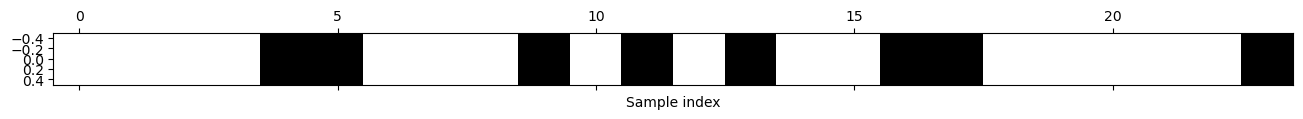

In [23]:
#Paper uses pairwise evaluation for feature selection want to use model based feature selection to 
#Have this model be different from overall model  

#extract features into X_train - all other columns excluding cluster strcture and reaction rate
features = data.loc[:, '3_VDE/VIE':'3_IEave']
rxn_rate = data.loc[:, 'lg(k1)']

X_train, X_test, y_train, y_test = train_test_split(features, rxn_rate, train_size=0.8, random_state=42)

from sklearn.feature_selection import RFE

select = RFE(
 RandomForestRegressor(n_estimators=100, random_state=42),
 n_features_to_select=8)

#plot feature importance and set threshold from there - validate that those features match what we would expect to be important intuivelt 

select.fit(X_train, y_train)
 # visualize the selected features:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")


#Validate that the feature selection went down
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))




In [25]:
#use model selected features to train model and 
selected_features = features.iloc[:, mask]

#Check the features and see how they compare to the references "rigorous" feature selection 
selected_features.head(5)

#train a model on the new features 
X_train, X_test, y_train, y_test = train_test_split(selected_features, rxn_rate, train_size=0.8, random_state=42)





,1_ΔQmax,1_ΔQmin,2_σave,2_Δnsave,2_ndave,3_ΔEHOMO,3_ΔEHOMO/NL,3_IEave
0,0.58359,0.42628,0.435080,-0.590000,4.990,-0.111289,-0.111289,8.181552
1,0.83986,0.61636,0.423660,-0.745000,4.985,-1.314787,-0.657394,8.726194
2,0.89688,0.79677,0.479070,-0.935000,5.050,-1.287033,-0.429011,9.233109
3,0.86203,0.85493,0.477260,-0.955000,5.055,-1.636681,-0.545560,9.052979
4,0.28329,0.10102,0.275837,-0.453334,4.940,-0.093875,-0.093875,7.909231


In [ ]:
bool_array = np.array(mask)
indices = np.where(bool_array)[0]


